In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [10]:
df = pd.read_csv('Data/raw.csv')

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57


In [12]:
x = df.drop(columns=['math_score'],axis = 1)

In [13]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group D,master's degree,standard,none,70,75
1,female,group C,bachelor's degree,free/reduced,completed,83,83
2,female,group D,some college,free/reduced,none,89,86
3,male,group C,master's degree,free/reduced,none,67,66
4,male,group E,high school,standard,none,64,57


In [14]:
print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental level of education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:   ['female' 'male']
categories in 'race_ethnicity' variable:   ['group D' 'group C' 'group E' 'group B' 'group A']
categories in 'parental level of education' variable:   ["master's degree" "bachelor's degree" 'some college' 'high school'
 "associate's degree" 'some high school']
categories in 'lunch' variable:   ['standard' 'free/reduced']
categories in 'test preparation course' variable:   ['none' 'completed']


In [15]:
y = df['math_score']

In [16]:
y

0      62
1      66
2      79
3      61
4      73
       ..
795    87
796    69
797    53
798    50
799    85
Name: math_score, Length: 800, dtype: int64

In [18]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer  = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features),
])

In [22]:
x = preprocessor.fit_transform(x)

In [24]:
x.shape

(800, 19)

In [25]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.03079054,  0.43405338],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.9302895 ,  0.96470125],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.34544287,  1.1636942 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.52274728, -1.02522827],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.49143847, -1.02522827],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.48382733,  1.36268716]])

In [27]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((640, 19), (160, 19))

In [30]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, r2_square

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 28.1428
- Mean Absolute Error: 4.2205
- R2 Score: 0.8769
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.7051
- Mean Absolute Error: 4.4969
- R2 Score: 0.8587


Lasso
Model performance for Training set
- Root Mean Squared Error: 43.0217
- Mean Absolute Error: 5.1721
- R2 Score: 0.8118
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 38.9612
- Mean Absolute Error: 4.9192
- R2 Score: 0.8147


Ridge
Model performance for Training set
- Root Mean Squared Error: 28.1477
- Mean Absolute Error: 4.2181
- R2 Score: 0.8769
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.6282
- Mean Absolute Error: 4.4916
- R2 Score: 0.8591


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 33.5872
- Mean Absolute Error: 4.6469
- R2 Score: 0.8531
----------------

In [32]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.859082
0,Linear Regression,0.858716
7,CatBoosting Regressor,0.828925
5,Random Forest Regressor,0.828449
1,Lasso,0.814692
8,AdaBoost Regressor,0.802391
6,XGBRegressor,0.790666
3,K-Neighbors Regressor,0.745812
4,Decision Tree,0.698486


In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.87


Text(0, 0.5, 'Predicted')

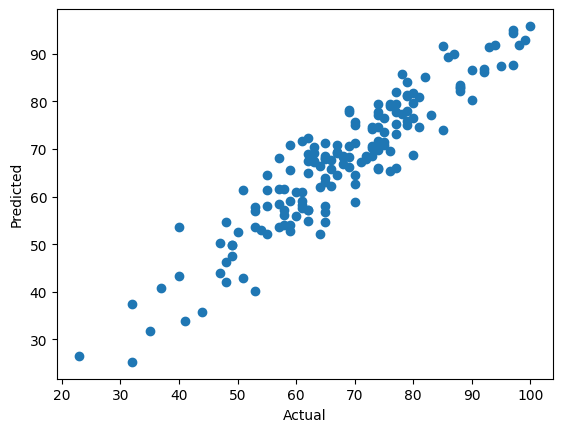

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

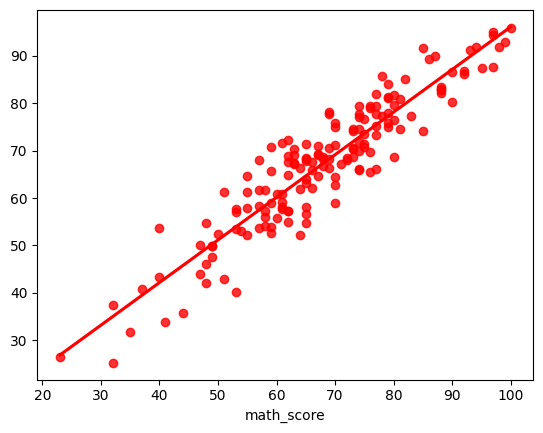

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [36]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
696,65,71.281770,-6.281770
667,59,58.980196,0.019804
63,63,70.364667,-7.364667
533,74,65.840368,8.159632
66,69,68.221324,0.778676
...,...,...,...
589,77,81.888710,-4.888710
798,50,52.498197,-2.498197
744,49,47.518389,1.481611
513,77,79.460910,-2.460910
